In [35]:
import pickle
import os
import sys
import matplotlib.pyplot as plt
from math import floor

sys.path.append('../utils')
sys.path.append('../visualization')

from utils import get_corr_table, get_weights

Read the best parameters configuration for each of the dimensionality reduction techniques

In [2]:
dataset_name = 'orl'
reduced_X_best = pickle.load(open(os.path.dirname(os.getcwd()) + f'/data/{dataset_name}/reduced/reduced_X_best.pkl', 'rb'))
X_train = pickle.load(open(os.path.dirname(os.getcwd()) + '/data/orl/processed/X_train.pkl', 'rb'))

Calculate the correlation with the original features

In [3]:
# Calculate variation of each component
weights = get_weights(reduced_X_best, n_components=150)

# Calculate correlation with original features
df_corrs, df_corrs_avg = get_corr_table(reduced_X_best, X_train, abs=False, weighted=True, weights=weights)

Select the most correlated pixels

In [92]:
df_corrs_avg

,index,KPCA,LLE,LOL,PCA,SLMVP
0,0,0.000336,0.000246,0.002069,0.004525,0.000300
1,1,0.000333,0.000249,0.002066,0.004509,0.000303
2,2,0.000334,0.000249,0.002095,0.004535,0.000304
3,3,0.000331,0.000250,0.002096,0.004545,0.000302
4,4,0.000332,0.000249,0.002079,0.004555,0.000305
...,...,...,...,...,...,...
10299,10299,0.000345,0.000369,0.001052,0.003815,0.000367
10300,10300,0.000337,0.000374,0.001029,0.003868,0.000376
10301,10301,0.000339,0.000348,0.001088,0.003855,0.000361
10302,10302,0.000329,0.000347,0.001078,0.003890,0.000346


In [5]:
df_corrs_avg = df_corrs_avg.reset_index()

most_correlated_pixels = {}
for key in df_corrs_avg.keys()[1:]:
    most_correlated_pixels[key] = df_corrs_avg.sort_values(by=key, ascending=False)['index'].values

Highlight the most correlated pixels

In [ ]:
train = pickle.load(open(os.path.dirname(os.getcwd()) + '/data/orl/split/X_train.pkl', 'rb'))

In [93]:
def plot_most_correlated_pixels(dim_technique, num_pixels):
    # Get the position of the most correlated pixels
    pixels_pos = [[floor(x/112), x % 112] for x in most_correlated_pixels[dim_technique][:num_pixels]]

    fig = plt.figure(figsize=(10, 80))

    # plot train data highlighting the most correlated pixels
    for person in range(train.shape[0])[:24]:
        plt.subplot(40, 6, person + 1)
        plt.imshow(train[person].reshape(112, 92), cmap='gray')
        for pixel in pixels_pos:
            plt.scatter(*pixel, color='red', s=10)
        plt.axis('off')

    fig.text(0.5, 1, dim_technique, ha='center', fontsize=20)

    plt.tight_layout()
    plt.show()

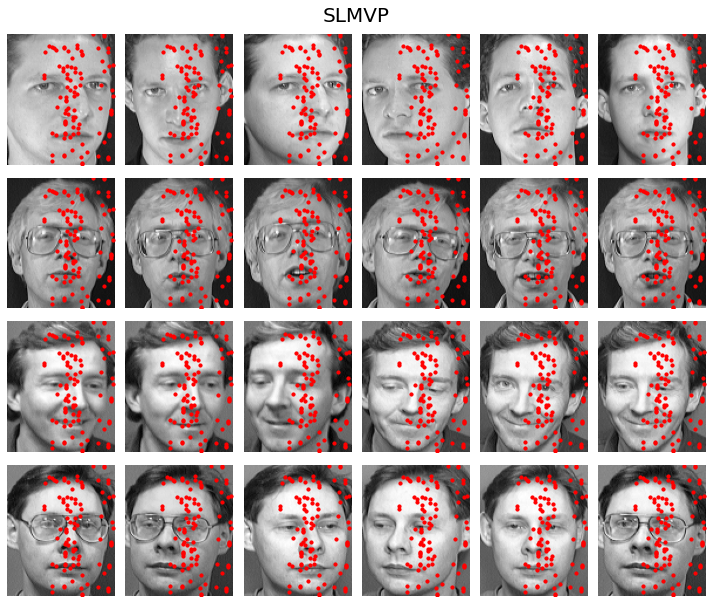

In [95]:
plot_most_correlated_pixels(dim_technique='SLMVP', num_pixels=100)

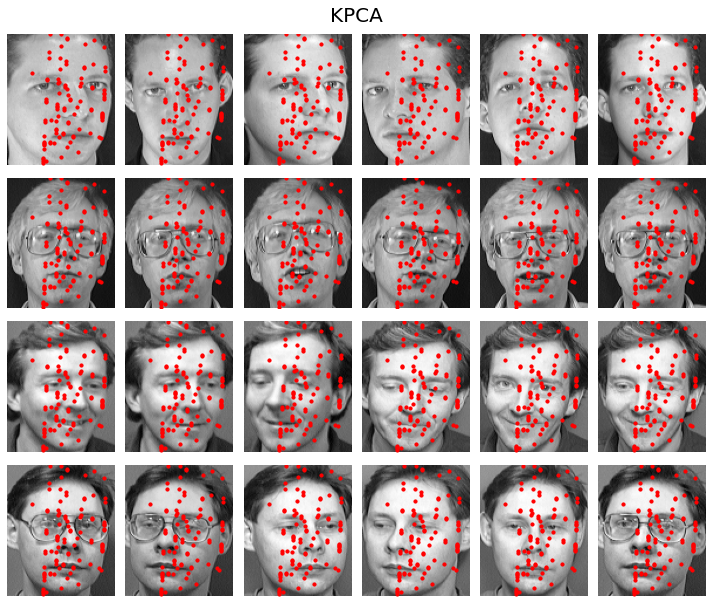

In [94]:
plot_most_correlated_pixels(dim_technique='KPCA', num_pixels=100)

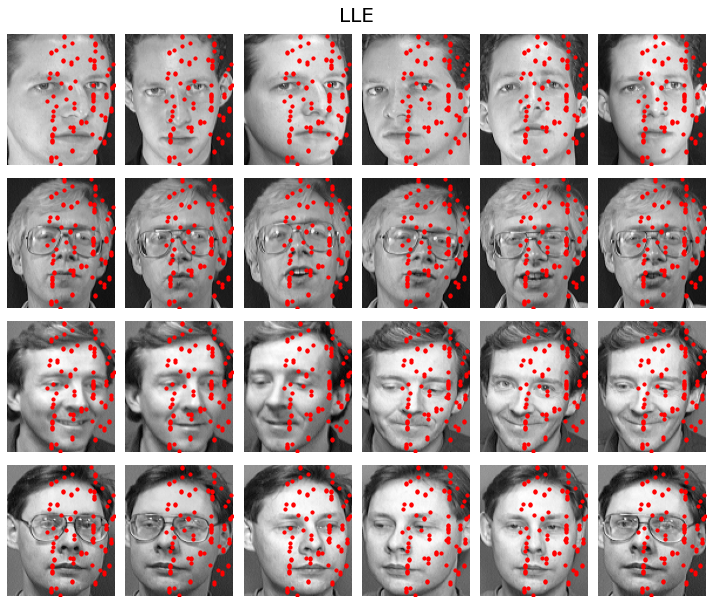

In [96]:
plot_most_correlated_pixels(dim_technique='LLE', num_pixels=100)

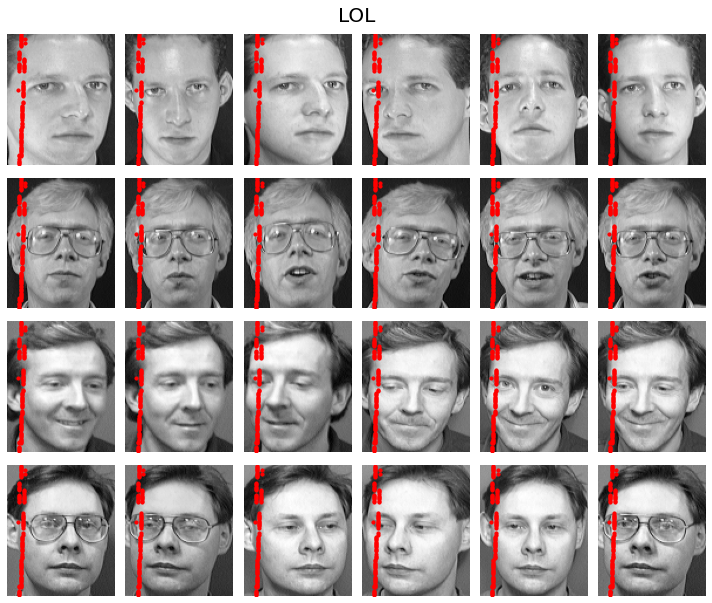

In [97]:
plot_most_correlated_pixels(dim_technique='LOL', num_pixels=100)

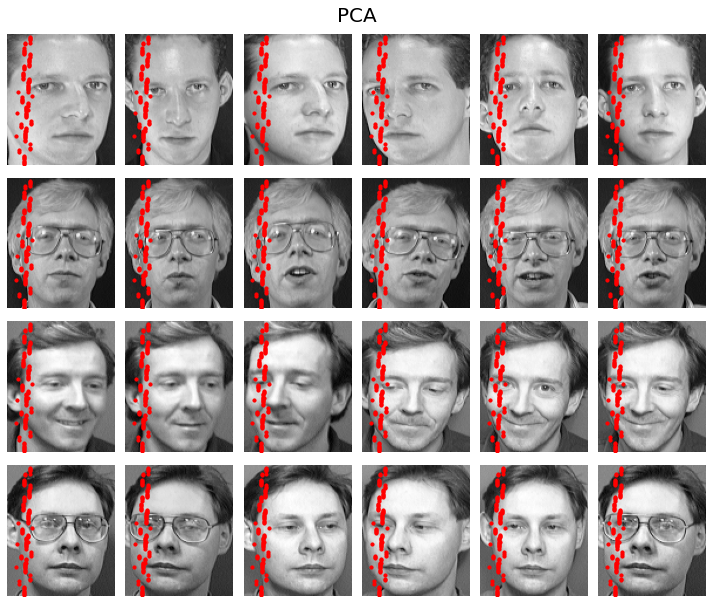

In [98]:
plot_most_correlated_pixels(dim_technique='PCA', num_pixels=100)